# CS371 Assignment #2: Image Classification using Convolutional Neural Networks (CNNs)
---
TA : Ayhan Suleymanzade (ayhansuleymanzade@kaist.ac.kr)

---

## Instructions
- In this assignment, we will classify the images in CIFAR10 dataset into 10 categories (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck) using Convolutional Neural Networks(CNNs).  

- To this end, you need to implement necessary network components (e.g. residual blocks) using nn. Module class and complete whole CNNs with those blocks. Then, you will experiment those network architectures using given train/testing pipeline and report classfication accuracies on the test set.      

- In each part, you will be given a starter code for the implementation. Please read the attached illustrations and instructions carefully to implement the codes.  

- As you follow the given steps, fill in the section marked ***Px.x*** (e.g. P1.1, P1.2, etc) with the appropriate code. **Note that you can only fill those marked areas, and cannot modify rest of the  skeleton code.**  

- In short, you should (1) complete the code, (2) experiment with several configurations of CNNs, and (3) report the final classification accuracies on the CIFAR10 test set.
- To start with, you should download this ipynb file into your own google drive.
You can save the file into your own google drive by clicking `make a copy(사본만들기)`. Find the copy in your drive, change their name to `assignment2.ipynb`, if their names were changed to e.g. `Copy of assignment2.ipyb` or `assignment2.ipynb의 사본`.

## Submission guidelines
- Your code and report will be all in Colab.
- <font color="red"> You will get the full credit **only if** you complete the code **and** match your results(classifiction accuarcy, number of parameter) with the values we provided on the bottom of the project. Once you trained all the models, we will automatically collect the experimental results.
 </font>
- <font color="red"> Again, do not modify the skeleton codes. Only write your code inside the designated area. </font>
- You may download this notebook to run the code on a local machine. However, we should be able to reproduce your results on Colab using your code. Please double-check if your code runs without error and reproduces your results **on Colab**. Submissions failed to run or reproduce the results will get a substantial penalty.

## Deliverables
- Download the following files from your google drive, and submit them in a zip file named as **[StudentID].zip**. For example, if your student ID is 20201234, the file name should be **20201234.zip**.
  - **[StudentID].ipynb**: Your Colab notebook.
  - **[model].pt**: The model checkpoints. You have to submit **4** models in total: `conv_best.pt`, `resPlain_best.pt`, `resBottleneck_best.pt`, and `inception_best.pt`.
 </font>
<font color="red">
- If your submission doesn't match the above deliverable, your score will be deducted!</font>
- Your assignment should be submitted through **KLMS**. All other submissions (e.g., via email) will not be considered as valid submissions.

## Plagiarism
**Plagiarism will not be tolerated**, and will be heavily penalized by an F for the course and by reporting to the head professor of student affairs as well as the head of School of Computing.
We use the following criteria:
- Reusing, or referring to other students/publisher’s solutions, assignments, program source code, and reports
- Using solution-sharing online services such as chegg.com for exams and assignments
- Allowing another student to refer from one’s own work
- Submitting another student’s work as his or her own
- Unpermitted collaboration or aid on take-home examinations and class assignments
- The use of another person's original work, regardless of lengths, without giving reasonable and appropriate credit to or acknowledging the author or source

We will use multiple tools for plagiarism checking. So please don't cheat.

## Due date
- **23:59:59 October 8th.**
- Late submission is allowed until 23:59:59 October 10th.
- Late submissions will have 20% penalty.
- You have 2 days of grace period throughout this course. The grace period will be used automatically. You don't need to notify it to TAs.
- **Quiz on assignment 2: In class, October 11th.**


## Questions
- Please use the Slack ```#assignment2``` QnA channel as the main communication channel.
- When you post questions, please make it public so that all students can share the information.
- Please use the prefix "[Assignment 2]" in the subject for all questions regarding this assignment (e.g., [Assignment 2] Regarding the grading policy).

## Changelog
None so far.


---

---


# Prerequisite: change the runtime type to **GPU**.
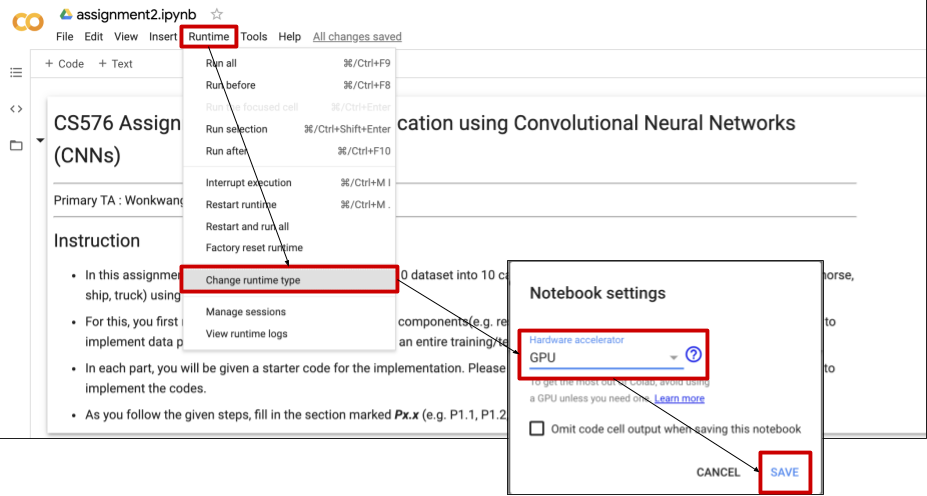

---
# Prerequisite: mount your gdrive.

In [1]:
# mount drive https://datascience.stackexchange.com/questions/29480/uploading-images-folder-from-my-system-into-google-colab
# login with your google account and type authorization code to mount on your google drive.
import os
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


---
# Prerequisite: setup the `root` directory properly.

In [2]:
# Specify the directory path where `assignemnt1.ipynb` exists.
# For example, if you saved `assignment1.ipynb` in `/gdrive/My Drive/CS471/assignment2` directory,
# then set root = '/gdrive/My Drive/CS471/assignment2'
root = '/gdrive/My Drive/CS71/assignment2'

---
# Import libraries

In [3]:
from PIL import Image
from tqdm import tqdm
from pathlib import Path
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

-----

# 1.Implementing Network Modules

In this assignment, you will implement four modularized blocks and one network class as follows:

**Block classes**  
(Example) Multilayer perceptron Block (MLPBlock) **To provide a starting point, the solutions for this section are given below.**  
(1) Convolutional block (ConvBlock)   
(2) Plain residual block (ResBlockPlain)  
(3) Residual block with bottleneck (ResBlockBottleneck)  
(4) Inception Block (InceptionBlock)

**Network class**  
(1) MyNetwork

In each cell, there is a starter code, a schematic illustration, and instructions that will guide you to implement each module correctly. Specifically, the schematic illustrations are to show you the computational graphs of modules, which give you high-level views on how the modules should be constructed and work. (E.g. which nn.Module to use, or input/output shape of each layer written in italics). Therefore, please read the illustrations and instructions carefully to complete the codes.
<!--
Below is an example.

### Example: ConvLayer Module [(Illustration)](https://docs.google.com/drawings/d/1_aPhPSPgh5-5FEfI_jnfp8r6-wNjY_QYXBT3zzjkHk0/edit?usp=sharing) -->

## Block class

### (Example) Implement MLP Block [(Illustration)](https://docs.google.com/drawings/d/17P4EZfF8ZoU6lllhg3quGHgDY8ol7wPEWOs3XutpHoU/edit?usp=sharing)  

In [4]:
class MLPBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(MLPBlock, self).__init__()
        """
        Initialize a basic multi-layer perceptron module components.
        Illustration: https://docs.google.com/drawings/d/17P4EZfF8ZoU6lllhg3quGHgDY8ol7wPEWOs3XutpHoU/edit?usp=sharing

        Instructions:
            1. Implement an algorithm that initializes necessary components as illustrated in the above link.
            2. Initialized network components will be referred in `forward` method
               for constructing the dynamic computational graph.

        Args:
            1. in_channels (int): Number of channels in input.
            2. out_channels (int): Number of channels to be produced.
        """
        #######################################
        ## This section is an example.       ##
        self.fc1 = nn.Linear(in_channels, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512,128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, out_channels)
        self.bn3 = nn.BatchNorm1d(out_channels)
        self.act = nn.ReLU()
        #######################################

    def forward(self, x):
        """
        Feed-forward data 'x' through the module.

        Instructions:
            1. Construct the feed-forward computational graph as illustrated in the link
               using the initialized components in __init__ method.

        Args:
            1. x (torch.FloatTensor): A tensor of shape (B, in_channels)
            .
        Returns:
            1. output (torch.FloatTensor): An output tensor of shape (B, out_channels).
        """
        #######################################
        ## This section is an example.       ##
        output = self.act(self.bn1(self.fc1(x)))
        output = self.act(self.bn2(self.fc2(output)))
        output = self.act(self.bn3(self.fc3(output)))
        #######################################
        return output

### (1) Implement Convolutional Block[(Illustration)](https://docs.google.com/drawings/d/1ZrJAfY0GwfQ1IcmFuJaroFF5rj7FQZ2nZ3kjQXywhNs/edit?usp=sharing) (10pt)

In [5]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1,
                 padding=1):
        super(ConvBlock, self).__init__()
        """
        Initialize a basic convolutional layer module components.
        Illustration: https://docs.google.com/drawings/d/1ZrJAfY0GwfQ1IcmFuJaroFF5rj7FQZ2nZ3kjQXywhNs/edit?usp=sharing

        Args:
            1. in_channels (int): Number of channels in the input.
            2. out_channels (int): Number of channels produced.
            3. kernel_size (int) : Size of the kernel used in conv layer (Default:3)
            4. stride (int) : Stride of the convolution (Default:1)
            5. padding (int) : Zero-padding added to both sides of the input (Default:1)
        """
        #################################
        ## P1.1. Write your code here  ##
        self.conv = nn.Conv2d(in_channels,out_channels, kernel_size= 3, stride = 1, padding= 1,bias = False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        #################################

    def forward(self, x):
        """
        Feed-forward the data 'x' through the module.
        Instructions:
            1. Construct the feed-forward computational graph as illustrated in the link
               using the initialized components in __init__ method.

        Args:
            1. x (torch.FloatTensor): A tensor of shape (B, in_channels, H, W).

        Returns:
            1. output (torch.FloatTensor): An output tensor of shape (B, out_channels, H, W).
        """
        #################################
        ## P1.2. Write your code here  ##
        output = self.relu(self.bn(self.conv(x)))
        #################################
        return output

### (2) Implement ResBlockPlain [(Illustration)](https://docs.google.com/drawings/d/1bpWUIZ8uwGmfhu-tKAa01l1qBl5oouxCBZQTy5pkRaQ/edit?usp=sharing) (10pt)

In [6]:
class ResBlockPlain(nn.Module):
    def __init__(self, in_channels):
        super(ResBlockPlain, self).__init__()
        """Initialize a residual block module components.

        Illustration: https://docs.google.com/drawings/d/1bpWUIZ8uwGmfhu-tKAa01l1qBl5oouxCBZQTy5pkRaQ/edit?usp=sharing

        Instructions:
            1. Implement an algorithm that initializes necessary components as illustrated in the above link.
            2. Initialized network components will be referred in `forward` method
               for constructing the dynamic computational graph.

        Args:
            1. in_channels (int): Number of channels in the input.
        """
        #################################
        ## P2.1. Write your code here ##
        self.conv1 = nn.Conv2d(in_channels,in_channels,kernel_size=3,stride=1,padding=1,bias=False)
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels,in_channels,kernel_size=3,stride=1,padding=1,bias=False)
        self.bn2 = nn.BatchNorm2d(in_channels)
        self.relu2 = nn.ReLU()
        #################################

    def forward(self, x):
        """Feed-forward the data `x` through the network.

        Instructions:
            1. Construct the feed-forward computational graph as illustrated in the link
               using the initialized components in __init__ method.

        Args:
            1. x (torch.FloatTensor): An tensor of shape (B, in_channels, H, W).

        Returns:
            1. output (torch.FloatTensor): An output tensor of shape (B, in_channels, H, W).
        """
        ################################
        ## P2.2. Write your code here ##
        output = self.relu1(self.bn1(self.conv1(x)))
        output = self.relu2(self.bn2(self.conv2(output))+x)
        ################################
        return output

### (3) Implement ResBlockBottleneck [(Illustration)](https://docs.google.com/drawings/d/1t55ibttP-X-8vPWYWFangN9pYdyDD6pVO7IJ_9tPgSA/edit?usp=sharing) (10pt)  

In [7]:
class ResBlockBottleneck(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(ResBlockBottleneck, self).__init__()
        """Initialize a residual block module components.

        Illustration: https://docs.google.com/drawings/d/1t55ibttP-X-8vPWYWFangN9pYdyDD6pVO7IJ_9tPgSA/edit?usp=sharing

        Instructions:
            1. Implement an algorithm that initializes necessary components as illustrated in the above link.
            2. Initialized network components will be referred in `forward` method
               for constructing the dynamic computational graph.

        Args:
            1. in_channels (int): Number of channels in the input.
            2. hidden_channels (int): Number of hidden channels produced by the first ConvLayer module.
        """
        #################################
        ## P3.1. Write your code here  ##
        self.conv1 = nn.Conv2d(in_channels,hidden_channels,kernel_size=1,stride=1,padding=0,bias=False)
        self.bn1 = nn.BatchNorm2d(hidden_channels)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(hidden_channels,hidden_channels,kernel_size=3,stride=1,padding=1,bias=False)
        self.bn2 = nn.BatchNorm2d(hidden_channels)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(hidden_channels,in_channels,kernel_size=1,stride=1,padding=0,bias=False)
        self.bn3 = nn.BatchNorm2d(in_channels)
        self.relu3 = nn.ReLU()
        #################################

    def forward(self, x):
        """Feed-forward the data `x` through the network.

        Instructions:
            1. Construct the feed-forward computational graph as illustrated in the link
               using the initialized components in __init__ method.

        Args:
            1. x (torch.FloatTensor): An tensor of shape (B, in_channels, H, W).

        Returns:
            1. output (torch.FloatTensor): An output tensor of shape (B, in_channels, H, W).
        """
        ################################
        ## P3.2. Write your code here ##
        output = self.relu1(self.bn1(self.conv1(x)))
        output = self.relu2(self.bn2(self.conv2(output)))
        output = self.relu3(self.bn3(self.conv3(output))+x)
        ################################
        return output

### (4) Implement InceptionBlock[(Illustration)](https://docs.google.com/drawings/d/1ph_2qLcAWm_voJKWWAB-_Id0PtpJ73W4GEQQ33m3WpY/edit?usp=sharing)  (20pt)

In [8]:
class InceptionBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock, self).__init__()
        """Initialize a basic InpcetionBlock module components.

        Illustration: https://docs.google.com/drawings/d/1ph_2qLcAWm_voJKWWAB-_Id0PtpJ73W4GEQQ33m3WpY/edit?usp=sharing
        Instructions:
            1. Implement an algorithm that initializes necessary components as illustrated in the above link.
            2. Initialized network components will be referred in `forward` method
               for constructing the dynamic computational graph.

        Args:
            1. in_channels (int): Number of channels in the input.
            2. out_channels (int): Number of channels in the final output.
        """
        assert out_channels%8==0, 'out channel should be mutiplier of 8'

        ################################
        ## P4.1. Write your code here ##
        o2,o4,o8 = out_channels//2,out_channels//4,out_channels//8
        self.cv1 = nn.Sequential(
          nn.Conv2d(in_channels,o4,kernel_size=1,stride=1,padding=0,bias=False),
          nn.BatchNorm2d(o4),
          nn.ReLU()
        )
        self.cv3 = nn.Sequential(
          nn.Conv2d(in_channels,o2,kernel_size=1,stride=1,padding=0,bias=False),
          nn.BatchNorm2d(o2),
          nn.ReLU(),
          nn.Conv2d(o2,o2,kernel_size=3,stride=1,padding=1,bias=False),
          nn.BatchNorm2d(o2),
          nn.ReLU()
        )
        self.cv5 = nn.Sequential(
          nn.Conv2d(in_channels,o8,kernel_size=1,stride=1,padding=0,bias=False),
          nn.BatchNorm2d(o8),
          nn.ReLU(),
          nn.Conv2d(o8,o8,kernel_size=5,stride=1,padding=2,bias=False),
          nn.BatchNorm2d(o8),
          nn.ReLU()
        )
        self.maxp = nn.Sequential(
          nn.MaxPool2d(kernel_size=3,stride=1,padding=1),
          nn.Conv2d(in_channels,o8,kernel_size=1,stride=1,padding=0,bias=False),
          nn.BatchNorm2d(o8),
          nn.ReLU()
        )
        ################################

    def forward(self, x):
        """Feed-forward the data `x` through the module.

        Instructions:
            1. Construct the feed-forward computational graph as illustrated in the link
               using the initialized components in the __init__ method.

        Args:
            1. x (torch.FloatTensor): A tensor of shape (B, in_channels, H, W).

        Returns:
            1. output (torch.FloatTensor): An output tensor of shape (B, out_channels, H, W).

        """
        ################################
        ## P4.2. Write your code here ##
        cv1_output = self.cv1(x)
        cv3_output = self.cv3(x)
        cv5_output = self.cv5(x)
        max_output = self.maxp(x)
        output = torch.concat([cv1_output,cv3_output,cv5_output,max_output],dim = 1)
        ################################
        return output

## Network class

### (Example) MyNetworkExample

The class `MyNetworkExample` is a sample network using `MLPBlock` implemented above. **You don't have to implement anything in this code section.**

In [9]:
class MyNetworkExample(nn.Module):
    def __init__(self, nf, block_type='mlp'):
        super(MyNetworkExample, self).__init__()
        """Initialize an entire network module components.

        Instructions:
            1. Implement an algorithm that initializes necessary components.
            2. Initialized network components will be referred in `forward` method
               for constructing the dynamic computational graph.

        Args:
            1. nf (int): Number of input channels for the first nn.Linear Module. An abbreviation for num_filter.
            2. block_type (str, optional): Type of blocks to use. ('mlp'. default: 'mlp')
        """
        #######################################
        ## This section is an example.       ##
        if block_type == 'mlp':
            block = MLPBlock
            # Since shape of input image is 3 x 32 x 32, the size of flattened input is 3*32*32.
            self.mlp = block(3*32*32, nf)
            self.fc = nn.Linear(nf, 10)
        else:
            raise Exception(f"Wrong type of block: {block_type}.Expected : mlp")
        #######################################

    def forward(self, x):
        """Feed-forward the data `x` through the network.

        Instructions:
            1. Construct the feed-forward computational graph as illustrated in the link
               using the initialized network components in __init__ method.
        Args:
            1. x (torch.FloatTensor): An image tensor of shape (B, 3, 32, 32).

        Returns:
            1. output (torch.FloatTensor): An output tensor of shape (B, 10).
        """
        #######################################
        ## This section is an example.       ##
        output = self.mlp(x.view(x.size()[0], -1))
        output = self.fc(output)
        return output
        #######################################

### (1) MyNetwork[(Illustration)](https://docs.google.com/drawings/d/1kk_oU9ZtaZlAchKruXykvDuBNpt-wVZ8pyBCIE7z3cU/edit?usp=sharing) (10pt)

There are two functions to implement in this section. **Read the comments and illustration carefully before you type anything.**

In [10]:
class MyNetwork(nn.Module):
    def __init__(self, nf, block_type='conv', num_blocks=[1, 1, 1]):
        super(MyNetwork, self).__init__()
        """Initialize an entire network module components.

        Illustration: https://docs.google.com/drawings/d/1kk_oU9ZtaZlAchKruXykvDuBNpt-wVZ8pyBCIE7z3cU/edit?usp=sharing

        Instructions:
            1. Implement an algorithm that initializes necessary components as illustrated in the above link.
            2. Initialized network components will be referred in `forward` method
               for constructing the dynamic computational graph.

        Args:
            1. nf (int): Number of output channels for the first nn.Conv2d Module. An abbreviation for num_filter.
            2. block_type (str, optional): Type of blocks to use. ('conv' | 'resPlain' | 'resBottleneck' | 'inception'. default: 'conv')
            3. num_blocks (list or tuple, optional): A list or tuple of length 3.
               Each item at i-th index indicates the number of blocks at i-th Layer.
               (default: [1, 1, 1])
        """

        self.block_type = block_type

        # Define blocks according to block_type
        if self.block_type == 'conv':
            block = ConvBlock
            block_args = lambda x: (x, x, 3, 1, 1)
        elif self.block_type == 'resPlain':
            block = ResBlockPlain
            block_args = lambda x: (x,)
        elif self.block_type == 'resBottleneck':
            block = ResBlockBottleneck
            block_args = lambda x: (x, x//2)
        elif self.block_type == 'inception':
            block = InceptionBlock
            block_args = lambda x: (x, x)
        else:
            raise Exception(f"Wrong type of block: {block_type}")

        # Define block layer by stacking multiple blocks.
        # You don't need to modify it. Just use these block layers in forward function.
        self.block1 = nn.Sequential(*[block(*block_args(nf)) for _ in range(num_blocks[0])])
        self.block2 = nn.Sequential(*[block(*block_args(nf*2)) for _ in range(num_blocks[1])])
        self.block3 = nn.Sequential(*[block(*block_args(nf*4)) for _ in range(num_blocks[2])])

        ################################
        ## P5.1. Write your code here ##
        self.conv1 = nn.Sequential(
            nn.Conv2d(3,nf,kernel_size=3,stride=1,padding=1,bias=False),
            nn.BatchNorm2d(nf),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(nf,nf*2,kernel_size=3,stride=1,padding=1,bias=False),
            nn.BatchNorm2d(nf*2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(nf*2,nf*4,kernel_size=3,stride=1,padding=1,bias=False),
            nn.BatchNorm2d(nf*4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.final = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(nf*4,10)
        )
        ################################

    def forward(self, x):
        """Feed-forward the data `x` through the network.

        Instructions:
            1. Construct the feed-forward computational graph as illustrated in the link
               using the initialized network components in __init__ method.
        Args:
            1. x (torch.FloatTensor): An image tensor of shape (B, 3, 32, 32).

        Returns:
            1. output (torch.FloatTensor): An output tensor of shape (B, 10).
        """

        #######################################################################
        ## P5.2. Write your code here                                        ##
        ## Hint : use self.block1, self.block2, self.block3 for block layers ##
        x = self.block1(self.conv1(x))
        x = self.block2(self.conv2(x))
        x = self.block3(self.conv3(x))
        output = self.final(x)
        #######################################################################
        return output

---

# 2.Experiment with Train/Test Pipeline

This section contains the entire train and test loop of the pipeline, specifically the followings:
1. feed inputs into the network, get outputs, and then compute classification loss.
2. backward the computed loss and update network weights (only in the training loop).
3. save tensorboard logs frequently.
4. save checkpoint weights frequently.

**There are no modifications necessary in this section.** Run the code and enjoy!

## Arguments and Environment Settings

This section contains code that
- defines miscellaneous arguments for our pipeline.
- runs Tensorboard to visualize accuracy and loss curves.

Optionally, you may change `args.ckpt_iter` and `args.`log_iter` as you wish to save space in your Google Drive.



In [11]:
# Configurations & Hyper-parameters

from easydict import EasyDict as edict

# set manual seeds
torch.manual_seed(470)
torch.cuda.manual_seed(470)

args = edict()

# basic options
args.name = 'main'                   # experiment name.
args.ckpt_dir = 'ckpts'              # checkpoint directory name.
args.ckpt_iter = 1000                # how frequently checkpoints are saved.
args.ckpt_reload = 'best'            # which checkpoint to re-load.
args.gpu = True                      # whether or not to use gpu.

# network options
args.num_filters = 16                # number of output channels in the first nn.Conv2d module in MyNetwork.
args.block_type = 'mlp'              # type of block. ('mlp' | 'conv' | 'resPlain' | 'resBottleneck' | 'inception').
args.num_blocks = [5, 5, 5]          # number of blocks in each Layer.

# data options
args.dataroot = 'dataset/cifar10'    # where CIFAR10 images exist.
args.batch_size = 128                # number of mini-batch size.

# training options
args.lr = 0.1                        # learning rate.
args.epoch = 100                     # training epoch.

# tensorboard options
args.tensorboard = True              # whether or not to use tensorboard logging.
args.log_dir = 'logs'                # to which tensorboard logs will be saved.
args.log_iter = 100                  # how frequently logs are saved.

In [12]:

# Basic settings
device = 'cuda' if torch.cuda.is_available() and args.gpu else 'cpu'

result_dir = Path(root) / 'results'
result_dir.mkdir(parents=True, exist_ok=True)

global_step = 0
best_accuracy = 0.

In [13]:
# Define train/test data loaders
# Use data augmentation in training set to mitigate overfitting.
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

train_dataset = CIFAR10(args.dataroot, download=True, train=True, transform=train_transform)
test_dataset = CIFAR10(args.dataroot, download=True, train=False, transform=test_transform)

train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, drop_last=False)

100%|██████████| 170498071/170498071 [00:03<00:00, 43564604.73it/s]


Extracting dataset/cifar10/cifar-10-python.tar.gz to dataset/cifar10
Files already downloaded and verified


## Tracking the states with Tensorboard

In following training stage, losses and accuracies will be logged on the tensorboard. It provides an useful data for analyzing training process.
Use tensorboard wisely.



In [ ]:

# Setup tensorboard.
if args.tensorboard:
    from torch.utils.tensorboard import SummaryWriter
    %load_ext tensorboard
    %tensorboard --logdir "/gdrive/My Drive/{str(result_dir).replace('/gdrive/My Drive/', '')}"
else:
    writer = None

## The Train-and-Test pipeline

In [15]:
def train_net(net, optimizer, scheduler, block_type, writer):
    global_step = 0
    best_accuracy = 0

    for epoch in range(args.epoch):
        # Here starts the train loop.
        net.train()
        for batch_idx, (x, y) in enumerate(train_dataloader):

            global_step += 1

            #  Send `x` and `y` to either cpu or gpu using `device` variable.
            x = x.to(device=device)
            y = y.to(device=device)

            # Feed `x` into the network, get an output, and keep it in a variable called `logit`.
            logit = net(x)

            # Compute accuracy of this batch using `logit`, and keep it in a variable called 'accuracy'.
            accuracy = (logit.argmax(1) == y).float().mean()

            # Compute loss using `logit` and `y`, and keep it in a variable called `loss`.
            loss = nn.CrossEntropyLoss()(logit, y)

            # flush out the previously computed gradient.
            optimizer.zero_grad()

            # backward the computed loss.
            loss.backward()

            # update the network weights.
            optimizer.step()

            if global_step % args.log_iter == 0 and writer is not None:
                # Log loss and accuracy values using `writer`. Use `global_step` as a timestamp for the log.
                writer.add_scalar('train_loss', loss, global_step)
                writer.add_scalar('train_accuracy', accuracy, global_step)

            if global_step % args.ckpt_iter == 0:
                # Save network weights in the directory specified by `ckpt_dir` directory.
                torch.save(net.state_dict(), f'{ckpt_dir}/{global_step}.pt')

        # Here starts the test loop.
        net.eval()
        with torch.no_grad():
            test_loss = 0.
            test_accuracy = 0.
            test_num_data = 0.
            for batch_idx, (x, y) in enumerate(test_dataloader):
                # Send `x` and `y` to either cpu or gpu using `device` variable..
                x = x.to(device=device)
                y = y.to(device=device)

                # Feed `x` into the network, get an output, and keep it in a variable called `logit`.
                logit = net(x)

                # Compute loss using `logit` and `y`, and keep it in a variable called `loss`.
                loss = nn.CrossEntropyLoss()(logit, y)

                # Compute accuracy of this batch using `logit`, and keep it in a variable called 'accuracy'.
                accuracy = (logit.argmax(dim=1) == y).float().mean()

                test_loss += loss.item()*x.shape[0]
                test_accuracy += accuracy.item()*x.shape[0]
                test_num_data += x.shape[0]

            test_loss /= test_num_data
            test_accuracy /= test_num_data

            if writer is not None:
                # Log loss and accuracy values using `writer`. Use `global_step` as a timestamp for the log.
                writer.add_scalar('test_loss', test_loss, global_step)
                writer.add_scalar('test_accuracy', test_accuracy, global_step)

                # Just for checking progress
                print(f'Test result of epoch {epoch}/{args.epoch} || loss : {test_loss:.3f} acc : {test_accuracy:.3f} ')

                writer.flush()

            # Whenever `test_accuracy` is greater than `best_accuracy`, save network weights with the filename 'best.pt' in the directory specified by `ckpt_dir`.
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                torch.save(net.state_dict(), f'{ckpt_dir}/{block_type}_best.pt')

        scheduler.step()
    return best_accuracy


## Train Models Through the Pipeline

Training a single model for 100 epochs will take around 40~50 minutes. Use this information as an indicator for your experiments.



In [16]:
# Function for weight initialization.
def weight_init(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            torch.nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.BatchNorm2d):
        torch.nn.init.constant_(m.weight, 1)
        torch.nn.init.constant_(m.bias, 0)

In [17]:
# List of all block types we will use.
block_types = ['mlp','conv','resPlain','resBottleneck','inception']

# Create directory name.
num_trial=0
parent_dir = result_dir / f'trial_{num_trial}'
while parent_dir.is_dir():
    num_trial = int(parent_dir.name.replace('trial_',''))
    parent_dir = result_dir / f'trial_{num_trial+1}'
print(f'Logs and ckpts will be saved in : {parent_dir}')

# Define networks
networks = []
for block_type in block_types:
    if block_type == 'conv':
        args.num_blocks = [10, 10, 10]
    else:
        args.num_blocks = [5, 5, 5]

    if block_type == 'mlp':
        network = MyNetworkExample(64, block_type).to(device)
    else:
        network = MyNetwork(args.num_filters, block_type, args.num_blocks).to(device)

    network.apply(weight_init)
    networks.append(network)

# Count the number of parameters of the models.
# You can use it as an indicator of whether you correctly implemented the model.

correct_params = {'mlp' : 1649354, 'conv' : 510426, 'resPlain' : 510426, 'resBottleneck' : 113946, 'inception' : 124026}
for block_type, net  in zip(block_types, networks):
    # Print the number of parameters in each model.
    num_parameters = sum(p.numel() for p in net.parameters() if p.requires_grad)
    print(f'# of parameters in {block_type} net : {num_parameters}')
    print(f'Correct # of parameters in {block_type} net : {correct_params[block_type]}')

Logs and ckpts will be saved in : /gdrive/My Drive/CS71/assignment2/results/trial_4
# of parameters in mlp net : 1649354
Correct # of parameters in mlp net : 1649354
# of parameters in conv net : 510426
Correct # of parameters in conv net : 510426
# of parameters in resPlain net : 510426
Correct # of parameters in resPlain net : 510426
# of parameters in resBottleneck net : 113946
Correct # of parameters in resBottleneck net : 113946
# of parameters in inception net : 124026
Correct # of parameters in inception net : 124026


In [ ]:
final_accs = {}

# Start training
for block_type, net in zip(block_types, networks):
    try:
        args.name = block_type

        # Define optimizer
        optimizer = optim.SGD(net.parameters(), lr=args.lr, momentum=0.9, weight_decay=0.0001)
        scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50,80], gamma=0.5)

        # Create directories for logs and ckechpoints.
        ckpt_dir = parent_dir / args.name / args.ckpt_dir
        ckpt_dir.mkdir(parents=True, exist_ok=True)
        log_dir = parent_dir / args.name / args.log_dir
        log_dir.mkdir(parents=True, exist_ok=True)

        # Create tensorboard writer,
        if args.tensorboard:
            writer = SummaryWriter(log_dir)

        # Call the train & test function.
        t1 = time.time()
        accuracy = train_net(net, optimizer, scheduler, block_type, writer)
        t = time.time()-t1
        print(f'Best test accuracy of {block_type} network : {accuracy:.3f} took {t:.3f} secs')
        final_accs[f'{block_type}'] = accuracy*100
    except Exception as e:
        print(e)

# Print final best accuracies of the models.
for key in final_accs.keys():
    print(f'Best accuracy of {key} = {final_accs[key]:.2f}%')


---
# 3.Aggregating experimental results and number of model parameters. (10pt)

In this section, we automatically collect the classification performance of trained model. Also, we will count the number of parameters in the models.
You should match your own results with the values we provided. While the number of the parameters should be exactly same, classification accuarcy should be in the range of $\pm$1.5%

In [19]:
block_types = ['mlp', 'conv','resPlain','resBottleneck','inception']
test_accs = {}
test_params= {}

for block_type, net in zip(block_types, networks):
        ckpt_dir = parent_dir / block_type / args.ckpt_dir
        # load weights from best checkpoints.
        ckpt_path = f'{ckpt_dir}/{block_type}_best.pt'
        try:
            net.load_state_dict(torch.load(ckpt_path))
        except Exception as e:
            print(e)

        # Measure test performance.
        net.eval()
        with torch.no_grad():
            test_accuracy = 0.
            test_num_data = 0.
            for batch_idx, (x, y) in enumerate(test_dataloader):
                # Send `x` and `y` to either cpu or gpu using `device` variable..
                x = x.to(device=device)
                y = y.to(device=device)

                # Feed `x` into the network, get an output, and keep it in a variable called `logit`.
                logit = net(x)

                # Compute loss using `logit` and `y`, and keep it in a variable called `loss`.
                loss = nn.CrossEntropyLoss()(logit, y)

                # Compute accuracy of this batch using `logit`, and keep it in a variable called 'accuracy'.
                accuracy = (logit.argmax(dim=1) == y).float().mean()

                test_accuracy += accuracy.item()*x.shape[0]
                test_num_data += x.shape[0]

            # Average classification accuracy.
            test_accuracy /= test_num_data

            # Count the number of implemented models.
            num_parameters = sum(p.numel() for p in net.parameters() if p.requires_grad)

            test_accs[f'{block_type}'] = test_accuracy*100
            test_params[f'{block_type}'] = num_parameters


In [20]:
# Printing final results.
correct_accs = {'mlp' : 62.6,'conv' : 81.9,'resPlain' : 88.6, 'resBottleneck' : 86.5, 'inception' : 83.7}
correct_params = {'mlp' : 1649354, 'conv' : 510426, 'resPlain' : 510426, 'resBottleneck' : 113946, 'inception' : 124026}

print(' Method        | Accuracy   | # Params    | Expected Acc | Expected # Params  ')
print('------------------------------------------------------------------------------')
for block in block_types:
        print(f' {block:14}| {str(test_accs[block])[:5]:11}| {str(test_params[block]):11} | {str(correct_accs[block])[:5]:13}| {str(correct_params[block]):12}')


 Method        | Accuracy   | # Params    | Expected Acc | Expected # Params  
------------------------------------------------------------------------------
 mlp           | 62.64      | 1649354     | 62.6         | 1649354     
 conv          | 82.43      | 510426      | 81.9         | 510426      
 resPlain      | 88.96      | 510426      | 88.6         | 510426      
 resBottleneck | 86.55      | 113946      | 86.5         | 113946      
 inception     | 83.55      | 124026      | 83.7         | 124026      
